# Imports

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
from tensorflow.keras import layers

# Preprocessing

In [3]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state=42)

In [5]:
print(X_train.dtype, X_val.dtype, X_test.dtype)

uint8 uint8 uint8


In [6]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


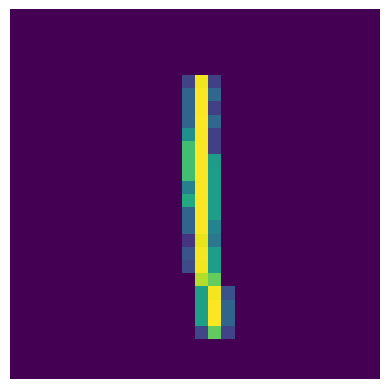

In [7]:
plt.imshow(X_train[0])
plt.axis("off");

Moreover, the pixel intensities
are represented as integers (from 0 to 255) rather than floats (from 0.0 to
255.0).<br>
so, for simplicity we can range them from 0 to 1 by dividing them by 255.0 to change theit type to float

In [8]:
X_train, X_val, X_test = X_train / 255., X_val / 255., X_test / 255.

In [9]:
print(X_train.dtype, X_val.dtype, X_test.dtype)

float64 float64 float64


In [10]:
X_train = X_train.reshape(X_train.shape[0],784)
X_val = X_val.reshape(X_val.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

# Modeling

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(300,'relu'),
    layers.Dense(200,'relu'),
    layers.Dense(100,'relu'),
    layers.Dense(10,'softmax')])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


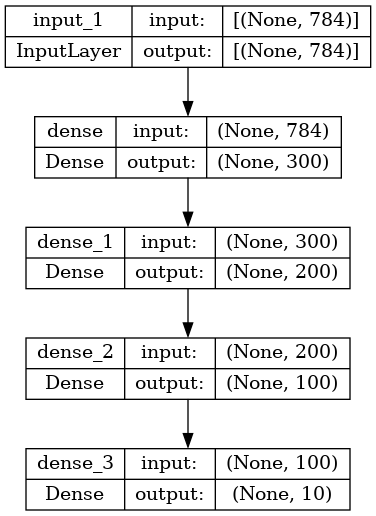

In [13]:
plot_model(model,show_shapes=True)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs = 10,validation_data=(X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4227 - accuracy: 0.8848 - val_loss: 0.2147 - val_accuracy: 0.9373
Epoch 2/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1723 - accuracy: 0.9501 - val_loss: 0.1451 - val_accuracy: 0.9562
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1252 - accuracy: 0.9639 - val_loss: 0.1156 - val_accuracy: 0.9652
Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0974 - accuracy: 0.9718 - val_loss: 0.1100 - val_accuracy: 0.9662
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0787 - accuracy: 0.9770 - val_loss: 0.0892 - val_accuracy: 0.9727
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0634 - accuracy: 0.9814 - val_loss: 0.0899 - val_accuracy: 0.9733
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0515 - accuracy: 0.9851 - val_loss: 0.0805 - val_accurac

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9769


[0.07064731419086456, 0.9768999814987183]

In [17]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
# to see the probability of each class
[round(i,5) for i in y_pred[0]]

[0.0, 0.0, 1e-05, 2e-05, 0.0, 0.0, 0.0, 0.99997, 0.0, 0.0]

In [19]:
y_pred = [i.argmax() for i in y_pred]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



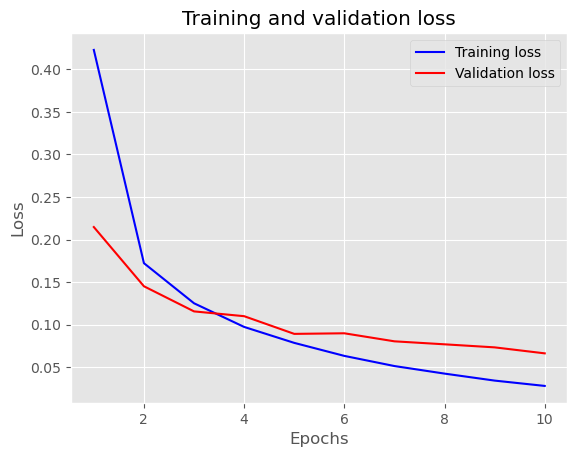

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

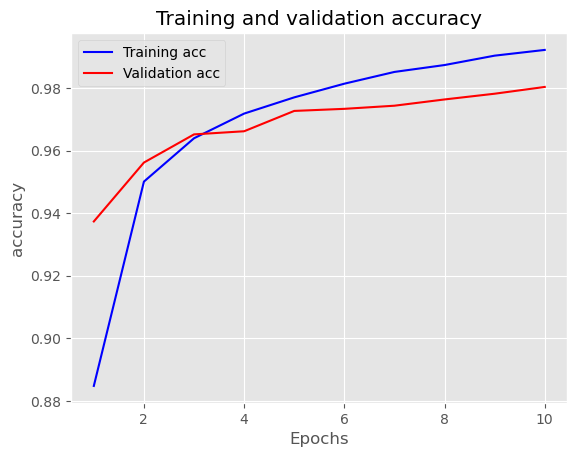

In [21]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()